
# Data Analysis for cost of care in healthcare
_by Hafsa Laeeque_

---
The task is to<br>
  > 1) analyze the **clinical and financial data** of patients hospitalized for a _certain condition_.<br>
    ~~2) join data given in the different tables.~~<br>
    3) find insights about **drivers of cost of care**.<br>
    4) document _approach, results and insights_ using [slides](https://docs.google.com/presentation/d/1-gYni51iGkYh4OCCr-BYKAV3YqUH4OzQOUAtz5MkrEg/edit?usp=sharing) and a [document](https://docs.google.com/document/d/1fQB0AP2ue_zKVUUAHx_1sJ626okOMtm_IdLOnw-9__A/edit?usp=sharing), both of which should have a similar narrative.<br>

---
We have cleaned and combined our data in [part 1](https://github.com/hafsalaeeque/cost-in-healthcare-DS-proj/blob/master/Analysis%20for%20healthcare%20-%20Part%201.ipynb).<br>
There are 2 datasets:
- `bill_per_patient`, it has 3000 patients' bill along with their personal details,
- `patient`, it has 3400 entries of 3000 patients' hospital admission dates along with their personal details & medical reports.
    
Based on the data, we will assume that for each time a patient was admitted, his weight,length of stay in hospital and health conditions were different and therefore, it accounts for the difference in amount billed for each admission. Thus, we will treat each entry in the `patient` as unique.<br>

We will also study `bill_per_patient` to understand if personal factors like age, gender, ethnicity group and citizenship affects cost of bill.


## Analysing the datasets
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta 
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
#display columns and rows
pd.options.display.max_columns = 50
pd.options.display.max_rows = 4000

### (A) Load the datasets
A1 - Let's load the first dataset `bill_per_patient.csv`.

In [3]:
df_bill = pd.read_csv('clean_datasets/bill_per_patient.csv')

In [4]:
df_bill.drop(['Unnamed: 0'], axis=1, inplace =True)

In [5]:
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
patient_id         3000 non-null object
gender             3000 non-null object
race               3000 non-null object
resident_status    3000 non-null object
date_of_birth      3000 non-null object
amount             3000 non-null float64
age                3000 non-null float64
dtypes: float64(2), object(5)
memory usage: 164.1+ KB


In [6]:
df_bill.head()

,patient_id,gender,race,resident_status,date_of_birth,amount,age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,19564.166266,47.0
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,20465.398960,42.0
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,21014.300917,36.0
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,45452.313094,71.0
4,541ad077cb4a0e64cc422673afe28aef,Male,Chinese,Singaporean,1970-12-12,22511.346126,47.0


In [7]:
df_bill.describe(include = 'all')

,patient_id,gender,race,resident_status,date_of_birth,amount,age
count,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,3000,2,4,3,2746,NaN,NaN
top,582701da165f01280a2cdd1d047c08c6,Male,Chinese,Singaporean,1975-08-20,NaN,NaN
freq,1,1503,1915,2392,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,24773.613948,57.193667
std,NaN,NaN,NaN,NaN,NaN,13846.477234,14.599722
min,NaN,NaN,NaN,NaN,NaN,2946.100354,27.000000
25%,NaN,NaN,NaN,NaN,NaN,15612.050486,45.000000
50%,NaN,NaN,NaN,NaN,NaN,21815.197138,55.000000
75%,NaN,NaN,NaN,NaN,NaN,29985.749788,70.000000


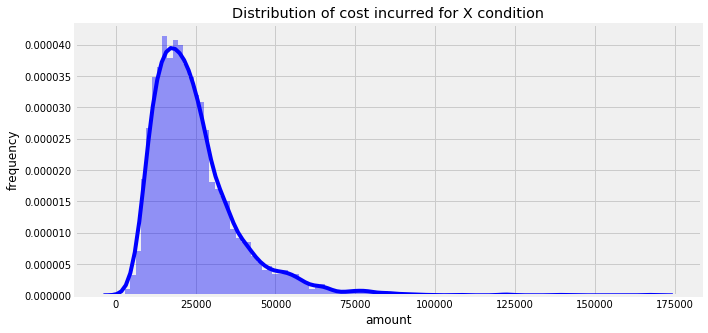

In [8]:
plt.figure(figsize=(10,5))
plt.xlabel('bill incurred')
plt.ylabel('frequency')
plt.title('Distribution of cost incurred for X condition')
sns.distplot(df_bill['amount'], bins = 100, kde = True, color ='b')

In [9]:
print df_bill.amount.mean()
print df_bill.amount.median()

24773.6139478
21815.1971378


The distribution graph is right-skewed, therefore the mean (average of patients) of the bill paid is higher than the median (average of 2 middle values).

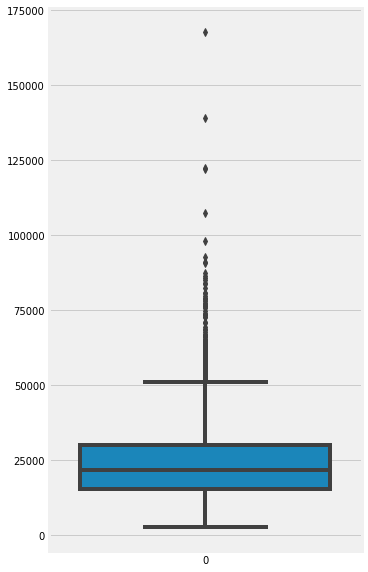

In [10]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=df_bill.amount)

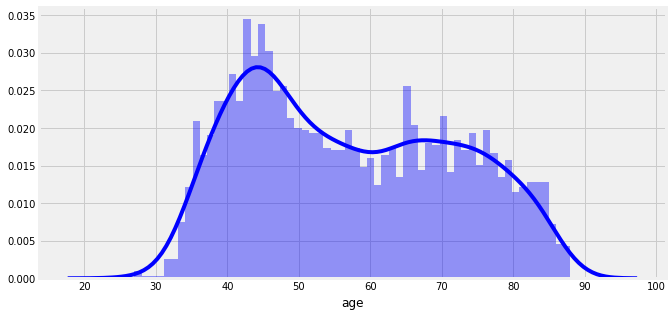

In [11]:
plt.figure(figsize=(10,5))

sns.distplot(df_bill['age'], bins = 60, kde = True, color ='b')

In [12]:
print df_bill.age.mean()
print df_bill.age.value_counts().head(10)
print df_bill.age.value_counts().tail(10)

57.1936666667
43.0    105
45.0    103
46.0     92
44.0     90
41.0     83
48.0     78
65.0     78
47.0     76
42.0     72
40.0     72
Name: age, dtype: int64
86.0    14
87.0    10
32.0     8
33.0     8
88.0     3
28.0     2
31.0     1
27.0     1
29.0     1
30.0     1
Name: age, dtype: int64


The age is slightly right-skewed. Most of the patients are in their mid-forties while a few of them are affected in their late eighties and their late twenties to early thirties. 

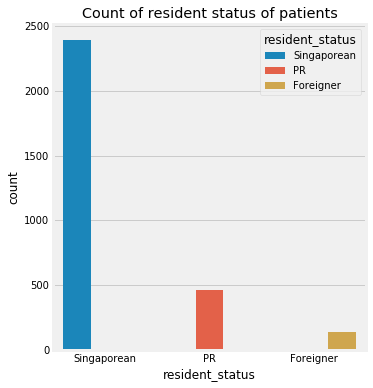

In [13]:
plt.figure(figsize=(5,6))
plt.xlabel('resident status of patients')
plt.ylabel('count')
plt.title('Count of resident status of patients')
sns.countplot(df_bill['resident_status'], hue = df_bill.resident_status)

Resident status does not affect a patient in any way.

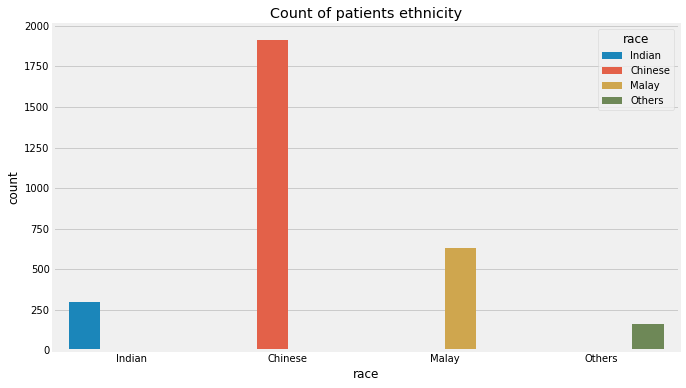

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('ethnicity of patients')
plt.ylabel('count')
plt.title('Count of patients ethnicity')
sns.countplot(df_bill['race'], hue = df_bill.race)

In [15]:
df_bill.race.value_counts()

Chinese    1915
Malay       629
Indian      295
Others      161
Name: race, dtype: int64

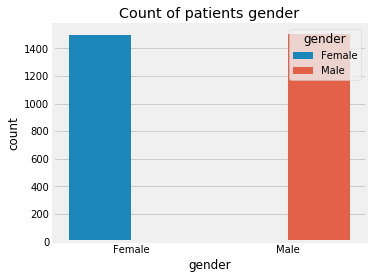

In [16]:
plt.figure(figsize=(5,4))
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Count of patients gender')
sns.countplot(df_bill['gender'], hue = df_bill.gender)

In [17]:
df_bill.gender.value_counts()

Male      1503
Female    1497
Name: gender, dtype: int64

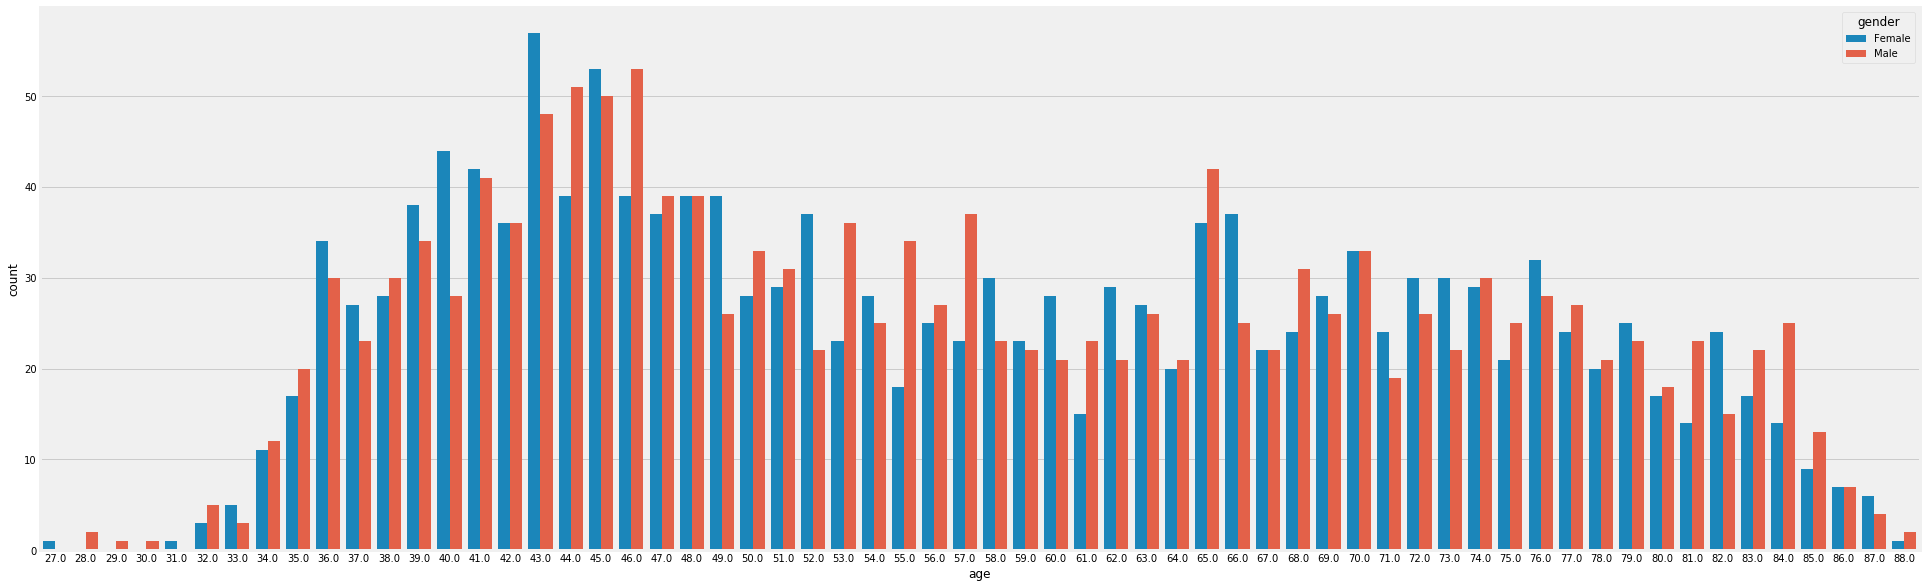

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(x="age", hue="gender", data=df_bill)

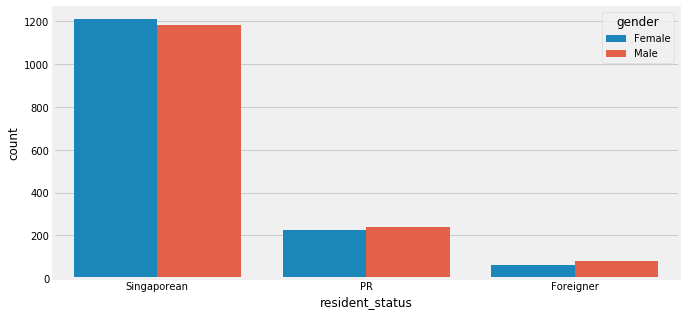

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="resident_status", hue="gender", data=df_bill)

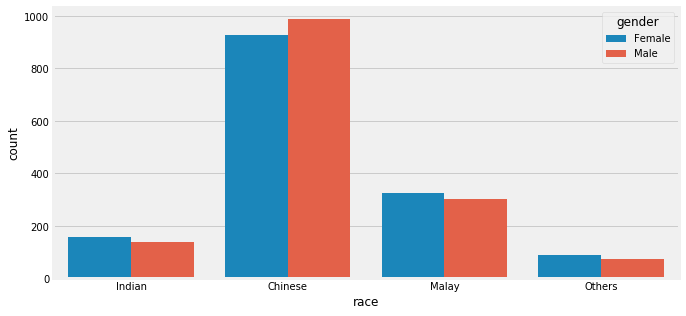

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="race", hue="gender", data=df_bill)

As gender is fairly equal, with there being only 6 more female patients than male patients, the conditions affects both genders of a racial group. The racial groups reflect the proportion of the different racial groups in Singapore. 


In [21]:
df_bill.corr()

,amount,age
amount,1.000000,0.275545
age,0.275545,1.000000


The correlation of age with the bill amount of 0.275 is low and closer to 0. Age does not factor into one's ability to be affected by the condition. 



---
A2 - Let's load the second dataset `patients.csv`.

In [75]:
df = pd.read_csv('clean_datasets/patients.csv')

In [76]:
df.shape

(3400, 35)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 35 columns):
Unnamed: 0            3400 non-null int64
patient_id            3400 non-null object
gender                3400 non-null object
race                  3400 non-null object
resident_status       3400 non-null object
date_of_birth         3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null float64
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int6

In [78]:
df.head()

,Unnamed: 0,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount
0,0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,2014-09-20,2014-10-04,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0,1,14 days 00:00:00.000000000,47.0,19564.17
1,1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,2014-08-08,2014-08-18,0,0.0,0.0,0,NaN,0,1,0,0,0,1,1,1,1,1,1,1,1,14.3,27.2,92.0,76.5,151.0,1,10 days 00:00:00.000000000,42.0,20465.40
2,2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2011-03-10,2011-03-20,0,0.0,0.0,0,0.0,1,0,0,1,1,1,1,0,0,0,1,1,1,14.4,26.6,92.0,69.7,175.0,2,10 days 00:00:00.000000000,36.0,14435.91
3,3,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2013-07-02,2013-07-14,0,0.0,0.0,1,NaN,0,0,1,1,0,1,0,1,1,0,0,1,0,18.0,26.6,92.0,66.7,175.0,2,12 days 00:00:00.000000000,36.0,6578.39
4,4,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,2015-10-28,2015-11-10,0,1.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,1,1,1,1,14.9,26.7,97.0,96.9,180.0,1,13 days 00:00:00.000000000,71.0,45452.31


In [79]:
df.drop(['Unnamed: 0'], axis=1, inplace =True)

From this second dataset, we will split it into a dataframe with **any missing values**.

In [80]:
df_null = df[df.isnull().any(axis=1)]
df_null.shape

(502, 34)

In [81]:
df.head()

,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,2014-09-20,2014-10-04,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0,1,14 days 00:00:00.000000000,47.0,19564.17
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,2014-08-08,2014-08-18,0,0.0,0.0,0,NaN,0,1,0,0,0,1,1,1,1,1,1,1,1,14.3,27.2,92.0,76.5,151.0,1,10 days 00:00:00.000000000,42.0,20465.40
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2011-03-10,2011-03-20,0,0.0,0.0,0,0.0,1,0,0,1,1,1,1,0,0,0,1,1,1,14.4,26.6,92.0,69.7,175.0,2,10 days 00:00:00.000000000,36.0,14435.91
3,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2013-07-02,2013-07-14,0,0.0,0.0,1,NaN,0,0,1,1,0,1,0,1,1,0,0,1,0,18.0,26.6,92.0,66.7,175.0,2,12 days 00:00:00.000000000,36.0,6578.39
4,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,2015-10-28,2015-11-10,0,1.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,1,1,1,1,14.9,26.7,97.0,96.9,180.0,1,13 days 00:00:00.000000000,71.0,45452.31


It is impossible to impute the missing data for the **second & fifth** medical history data as the important question is how are we to impute it without adding bias to the data. The data is simply missing; the patient could either have or not have the mentioned medical history and this data is not provided in the dataset. The best option is to drop the rows with missing values and work with the rest.

We are dropping 502 rows, which is 14.7% of the total dataset.

In [82]:
df.dropna(inplace = True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 3399
Data columns (total 34 columns):
patient_id            2898 non-null object
gender                2898 non-null object
race                  2898 non-null object
resident_status       2898 non-null object
date_of_birth         2898 non-null object
date_of_admission     2898 non-null object
date_of_discharge     2898 non-null object
medical_history_1     2898 non-null int64
medical_history_2     2898 non-null float64
medical_history_3     2898 non-null float64
medical_history_4     2898 non-null int64
medical_history_5     2898 non-null float64
medical_history_6     2898 non-null int64
medical_history_7     2898 non-null int64
preop_medication_1    2898 non-null int64
preop_medication_2    2898 non-null int64
preop_medication_3    2898 non-null int64
preop_medication_4    2898 non-null int64
preop_medication_5    2898 non-null int64
preop_medication_6    2898 non-null int64
symptom_1             2898 non-null int6

In [84]:
df.head()

,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,2014-09-20,2014-10-04,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0,1,14 days 00:00:00.000000000,47.0,19564.17
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2011-03-10,2011-03-20,0,0.0,0.0,0,0.0,1,0,0,1,1,1,1,0,0,0,1,1,1,14.4,26.6,92.0,69.7,175.0,2,10 days 00:00:00.000000000,36.0,14435.91
4,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,2015-10-28,2015-11-10,0,1.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,1,1,1,1,14.9,26.7,97.0,96.9,180.0,1,13 days 00:00:00.000000000,71.0,45452.31
5,541ad077cb4a0e64cc422673afe28aef,Male,Chinese,Singaporean,1970-12-12,2011-06-02,2011-06-13,0,0.0,0.0,0,0.0,0,0,1,1,1,0,1,1,1,1,1,1,1,14.1,27.3,98.0,91.6,166.0,1,11 days 00:00:00.000000000,47.0,22511.35
7,94f7d3a8a4d6bb14859b64c3f03e4a6c,Male,Malay,Singaporean,1975-09-14,2012-03-06,2012-03-18,0,0.0,0.0,0,1.0,0,0,1,1,1,1,1,1,1,1,0,1,0,14.4,27.3,107.0,90.1,173.0,2,12 days 00:00:00.000000000,42.0,17995.22


Oddly, I thought adding the patient's BMI in the data would help to quantify the amount of tissue mass (muscle, fat, and bone) in an individual, and then categorize that person as **underweight, normal weight, overweight, or obese** based on that value.
- Underweight (<18.5)
- Normal weight (18.5 and 24.9)
- Overweight (25 and 29.9)
- Obese (30 and 39.9) 

In [87]:
df['bmi'] = df['weight']/(df['height']/100)**2

In [116]:
df.corr()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,age,amount,bmi
medical_history_1,1.000000,0.006337,-0.021958,-0.012486,-0.008331,-0.002983,-0.002570,0.007925,-0.001972,0.003979,-0.004852,0.001526,-0.019683,-0.007761,-0.044375,0.030293,-0.007508,-0.006533,0.028214,-0.030432,-0.006409,0.023888,-0.009943,0.001327,0.038136,0.232391,0.031811
medical_history_2,0.006337,1.000000,0.018631,0.038662,-0.002054,0.001913,-0.024951,0.027699,0.011091,-0.011372,0.007962,-0.009294,0.025297,-0.002540,0.006442,-0.003501,-0.002690,0.004408,-0.002955,0.011315,-0.014340,-0.002657,0.010136,0.005807,0.020201,0.037990,-0.010085
medical_history_3,-0.021958,0.018631,1.000000,0.010160,-0.011475,-0.009277,0.013636,0.005740,0.018566,0.018337,0.014196,-0.010052,-0.016550,-0.000299,0.026678,0.005943,0.022878,-0.006550,-0.003346,-0.004478,0.002434,0.036397,-0.008291,-0.007851,-0.015543,0.012892,0.042682
medical_history_4,-0.012486,0.038662,0.010160,1.000000,-0.001542,-0.033097,-0.010918,-0.027523,0.000469,0.004712,-0.032082,0.023369,0.005737,0.030252,-0.014682,0.033730,-0.029487,0.004656,0.013507,-0.021880,-0.016369,0.002399,-0.008235,-0.016528,0.006568,-0.002077,0.009274
medical_history_5,-0.008331,-0.002054,-0.011475,-0.001542,1.000000,0.018609,0.010473,0.005422,-0.015589,-0.001687,0.027440,0.015255,0.013451,0.017867,-0.004220,-0.035123,0.014361,0.013136,-0.009407,-0.005871,0.001443,-0.011949,-0.020145,0.015695,-0.012604,0.040635,-0.000384
medical_history_6,-0.002983,0.001913,-0.009277,-0.033097,0.018609,1.000000,-0.004899,0.013030,0.034322,-0.033956,0.006068,-0.002049,-0.013871,0.021700,-0.001243,-0.012601,-0.007395,0.003921,0.014493,-0.002110,-0.007767,0.011913,0.026275,0.025882,-0.024811,0.139506,-0.002642
medical_history_7,-0.002570,-0.024951,0.013636,-0.010918,0.010473,-0.004899,1.000000,0.009110,-0.018533,0.000624,0.035697,-0.019184,-0.020783,-0.010323,-0.023646,0.012622,0.008715,-0.010839,0.022123,-0.003440,-0.001280,-0.012697,-0.022017,-0.025868,-0.021534,0.026022,-0.000888
preop_medication_1,0.007925,0.027699,0.005740,-0.027523,0.005422,0.013030,0.009110,1.000000,0.004083,-0.005988,-0.000722,-0.013262,-0.011540,0.015444,0.004870,-0.020880,0.038320,0.020698,0.012189,-0.002604,-0.005054,-0.019767,0.002490,0.020569,0.004765,0.028112,-0.020509
preop_medication_2,-0.001972,0.011091,0.018566,0.000469,-0.015589,0.034322,-0.018533,0.004083,1.000000,-0.018652,0.008845,0.011565,-0.009348,0.017368,0.013178,0.013674,-0.012287,0.018694,0.001341,-0.042764,0.004130,0.014866,0.002451,0.019764,-0.001407,0.032771,0.013048
preop_medication_3,0.003979,-0.011372,0.018337,0.004712,-0.001687,-0.033956,0.000624,-0.005988,-0.018652,1.000000,0.007391,0.020903,-0.005605,-0.004740,0.019374,-0.008070,-0.001671,0.000232,-0.009424,-0.015936,-0.031090,-0.003747,0.007824,-0.014573,-0.035179,0.004311,-0.008101


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
medical_history_1,2898.0,0.171498,0.377008,0.000000,0.000000,0.000000,0.000000,1.000000
medical_history_2,2898.0,0.317460,0.465569,0.000000,0.000000,0.000000,1.000000,1.000000
medical_history_3,2898.0,0.137336,0.344261,0.000000,0.000000,0.000000,0.000000,1.000000
medical_history_4,2898.0,0.054520,0.227081,0.000000,0.000000,0.000000,0.000000,1.000000
medical_history_5,2898.0,0.064872,0.246343,0.000000,0.000000,0.000000,0.000000,1.000000
medical_history_6,2898.0,0.256384,0.436711,0.000000,0.000000,0.000000,1.000000,1.000000
medical_history_7,2898.0,0.253968,0.435355,0.000000,0.000000,0.000000,1.000000,1.000000
preop_medication_1,2898.0,0.500345,0.500086,0.000000,0.000000,1.000000,1.000000,1.000000
preop_medication_2,2898.0,0.587647,0.492343,0.000000,0.000000,1.000000,1.000000,1.000000
preop_medication_3,2898.0,0.821601,0.382914,0.000000,1.000000,1.000000,1.000000,1.000000


The graph here seems normalized. Unfortunately, most of these values fall above the 25.0 range and are in the overweight and obese category. Could this mean that having a BMI that falls in the unhealty range is one of the causes that contributes to patients having this condition?

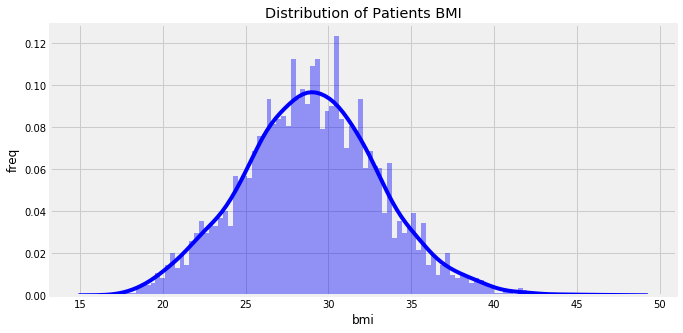

In [95]:
plt.figure(figsize=(10,5))
plt.xlabel('BMI of patients')
plt.ylabel('freq')
plt.title('Distribution of Patients BMI')
sns.distplot(df['bmi'], bins = 100, kde = True, color ='b')

This merely shows the occurrences for a particular BMI value. 

In [104]:
print df.bmi.value_counts().head(10)

25.909457    4
35.969072    4
28.141102    4
27.582477    4
30.624662    4
30.470914    4
25.910872    4
25.829082    4
25.104163    3
25.577717    3
Name: bmi, dtype: int64


**83.4%** of the patients in the dataset have an **unhealthy BMI**. Based on the linear relationship between BMI and the amount paid for patients, BMI seems to affect 14.5% as to the amount paid.

In [124]:
# Underweight (<18.5)
# Normal weight (18.5 and 24.9)
# Overweight (25 and 29.9)
# Obese (30 and 39.9)
df[df.bmi >= 25.0].shape

(2418, 35)

In [147]:
#underweight, 0.138%
df[df.bmi < 18.5].shape

(4, 35)

In [148]:
#healthy, 15.9% of all patients
df[(df.bmi >= 18.5) & (df.bmi <= 24.9)].shape

(462, 35)

**42.3%** of the patients are **overweight**.

In [127]:
df[(df.bmi >= 25) & (df.bmi <= 29.9)].shape

(1226, 35)

In [119]:
df[df.bmi >= 30].shape

(1162, 35)

**39.5%** of the patients are **obese**.

In [130]:
df[(df.bmi >= 30) & (df.bmi <= 39.9)].shape

(1146, 35)

**0.55%** of the patients are **extremely obese**.

In [126]:
df[df.bmi > 39.9].shape

(16, 35)

Other contributing factors that weigh in to the costs include: 

- 5th symptom (0.51),
- 1st medical history (0.23),
- age (0.33), 
- weight (0.16), 
- 3rd (0.18) symptom 

---

Let's explore these factors.

---
**5th symptom**

**52.8%** of the patients suffered from the **5th listed symptom**.

In [132]:
df[df.symptom_5 == 1].shape

(1531, 35)

**44%** of the patients suffered from the **5th listed symptom & had an unhealthy BMI**.

In [133]:
df[(df.symptom_5 == 1) & (df.bmi >= 25)].shape

(1277, 35)

**8.76%** of the patients suffered from the **5th listed symptom & had a healthy BMI**.

In [135]:
df[(df.symptom_5 == 1) & (df.bmi <= 25)].shape

(254, 35)

**1st medical history**

**17%** of the patients suffered from the **1st medical history**.

In [136]:
df[df.medical_history_1 == 1].shape

(497, 35)

**14%** of the patients suffered from the **1st medical history & had an unhealthy BMI**.<br>
**83%** of patients suffering from 1st medical history, had an **unhealthy BMI**.

In [137]:
df[(df.medical_history_1 == 1) & (df.bmi >= 25)].shape

(416, 35)

**2.79%** of the patients suffered from the **1st medical history & had a healthy BMI**.<br>
**16.2%** of patients suffering from 1st medical history, had a **healthy BMI**.

In [139]:
df[(df.medical_history_1 == 1) & (df.bmi <= 25)].shape

(81, 35)

**Age**

In [145]:
df_underweight = df[df.bmi < 18.5]

In [149]:
df_healthy = df[(df.bmi >= 18.5) & (df.bmi <= 24.9)]

In [140]:
df_overweight = df[(df.bmi >= 25) & (df.bmi <= 29.9)]

In [141]:
df_obese = df[(df.bmi >= 30) & (df.bmi <= 39.9)]

In [142]:
df_ex_obese = df[df.bmi > 39.9]

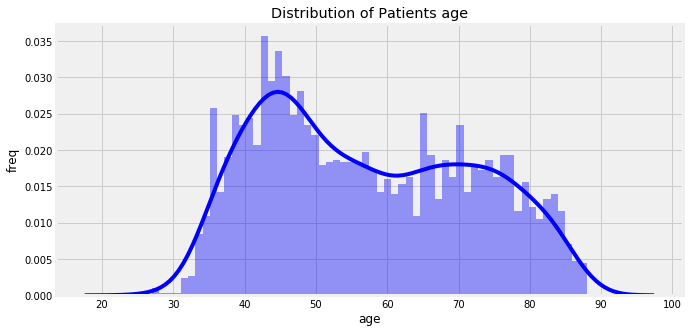

In [154]:
plt.figure(figsize=(10,5))
plt.xlabel('Age of patients')
plt.ylabel('freq')
plt.title('Distribution of Patients age')
sns.distplot(df['age'], bins = 60, kde = True, color ='b')

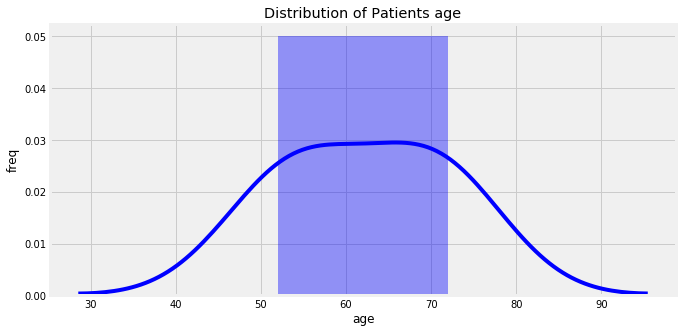

In [158]:
plt.figure(figsize=(10,5))
plt.xlabel('Age of patients')
plt.ylabel('freq')
plt.title('Distribution of Patients age')
sns.distplot(df_underweight['age'], kde = True, color ='b')

In [160]:
df_underweight.age

122     52.0
1427    72.0
3161    69.0
3280    56.0
Name: age, dtype: float64

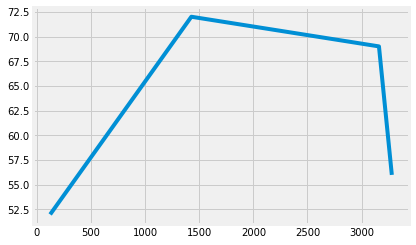

In [167]:
df_underweight['age'].plot()

In [162]:
df_underweight

,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount,bmi
122,1c0acdc20b933fe5f73b82addb4deee1,Female,Chinese,Singaporean,1966-04-05,2015-07-09,2015-07-17,0,1.0,0.0,0,0.0,0,1,1,1,1,0,1,0,1,1,0,0,0,16.3,32.1,73.0,50.6,170.0,1,8 days 00:00:00.000000000,52.0,8856.22,17.508651
1427,d7a6730ce89f40a2ac2fce583c311073,Female,Others,Singaporean,1946-07-27,2011-07-14,2011-07-24,0,0.0,0.0,0,0.0,1,1,0,1,1,1,1,1,0,1,1,1,0,16.8,25.4,141.0,52.7,171.0,2,10 days 00:00:00.000000000,72.0,17776.63,18.022639
3161,843eed84d4663e531a16339343a3112f,Female,Chinese,Singaporean,1949-06-08,2012-08-10,2012-08-21,0,0.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,0,0,1,0,15.7,26.6,140.0,52.2,168.0,1,11 days 00:00:00.000000000,69.0,8404.75,18.494898
3280,17e829dc813397fff95c9f88973bb83a,Female,Chinese,Singaporean,1962-01-22,2014-04-21,2014-05-06,0,0.0,0.0,0,1.0,1,0,0,0,0,1,1,0,0,1,1,1,0,14.1,27.3,97.0,49.3,164.0,1,15 days 00:00:00.000000000,56.0,12527.53,18.329863


In [169]:
df_underweight.age.mean()

62.25

A few insights we can draw from patients who are underweight:<br>


1) there are 4 patients,<br>
2) all 4 are female,<br>
3) all are Singaporean,<br>
4) 3 out of 4 of them are Chinese and 1 is of another race,<br>
5) age ranges from 52 to 72, averaging at 62,<br>
6) hospitalized for an average of 11 days,<br>
7) 3 out of 4 has been hospitalized once, while 1 of them has been hospitalized twice,<br>
8) 2 of the 4 patients that paid over $10,000 had the 2nd, 3rd & 4th symptom,<br>
9) The patient who paid the most took 5 of the 6 pre-op medication,<br>
10) The 2 patients that paid the most had 2 medical histories while the rest had none.

---

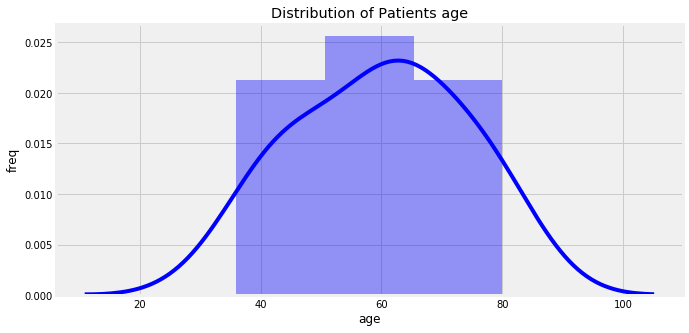

In [170]:
plt.figure(figsize=(10,5))
plt.xlabel('Age of patients')
plt.ylabel('freq')
plt.title('Distribution of Patients age')
sns.distplot(df_ex_obese['age'], kde = True, color ='b')

In [171]:
df_ex_obese.age

143     62.0
144     62.0
523     36.0
638     66.0
918     42.0
1102    74.0
1128    43.0
1310    47.0
1958    79.0
2145    63.0
2149    80.0
2392    55.0
2555    76.0
2558    65.0
2619    58.0
2984    47.0
Name: age, dtype: float64

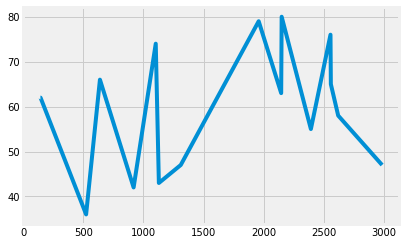

In [172]:
df_ex_obese['age'].plot()

In [173]:
df_ex_obese

,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount,bmi
143,371aef4418fe5702448f2c943cac88c9,Female,Malay,Singaporean,1956-06-24,2012-06-12,2012-06-22,1,0.0,0.0,0,0.0,1,1,0,1,1,0,1,0,1,1,0,1,1,14.8,30.7,76.0,99.8,155.0,2,10 days 00:00:00.000000000,62.0,54142.01,41.540062
144,371aef4418fe5702448f2c943cac88c9,Female,Malay,Singaporean,1956-06-24,2012-07-04,2012-07-13,0,0.0,0.0,0,0.0,0,0,0,1,0,1,1,1,1,1,1,0,1,13.0,25.7,103.0,100.8,155.0,2,9 days 00:00:00.000000000,62.0,38803.42,41.956296
523,9ee4e02dd783b97f730ef1b6a3fd2607,Female,Chinese,Singaporean,1982-01-27,2015-05-19,2015-05-27,0,0.0,1.0,0,0.0,0,0,1,1,1,0,1,1,0,1,1,0,1,14.9,25.1,109.0,110.7,154.0,1,8 days 00:00:00.000000000,36.0,19160.03,46.677349
638,758863dca517d2ed5f625dadf4c4f1d7,Female,Chinese,Singaporean,1952-05-15,2014-02-25,2014-03-07,1,1.0,0.0,0,0.0,0,0,1,0,1,1,1,0,1,1,1,1,0,15.7,29.3,91.0,97.2,151.0,1,10 days 00:00:00.000000000,66.0,25135.43,42.629709
918,983263192b7917b0851da234111f1b1f,Male,Chinese,PR,1976-08-15,2014-05-24,2014-06-05,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,0,1,0,1,1,14.1,27.1,106.0,104.1,161.0,1,12 days 00:00:00.000000000,42.0,22392.32,40.160488
1102,c75988a6aa3bb01616d3c2d49b481778,Female,Chinese,Singaporean,1944-03-25,2012-02-28,2012-03-11,0,0.0,0.0,0,0.0,0,0,0,0,1,0,1,1,0,1,1,0,1,12.9,27.1,105.0,101.7,151.0,1,12 days 00:00:00.000000000,74.0,24653.78,44.603307
1128,4d210654fbb0bf0d0d24042d60c5fa8a,Female,Indian,Singaporean,1974-11-12,2013-03-13,2013-03-27,0,0.0,0.0,1,0.0,1,1,0,1,1,1,1,1,1,1,0,0,0,13.9,26.7,71.0,109.1,159.0,1,14 days 00:00:00.000000000,43.0,16824.38,43.154938
1310,705958c8b61e22a7b1f441891ffbcf75,Female,Chinese,Singaporean,1970-09-12,2013-08-17,2013-08-25,0,0.0,1.0,0,0.0,0,0,0,0,1,0,0,0,1,1,0,1,1,14.4,27.1,86.0,102.7,157.0,1,8 days 00:00:00.000000000,47.0,20987.85,41.664976
1958,040c3b478b5c1c0a00037d87f1563fcb,Female,Malay,Singaporean,1938-11-01,2011-12-10,2011-12-18,0,0.0,0.0,0,0.0,1,0,1,0,1,0,0,1,1,0,1,0,0,11.3,28.1,79.0,100.1,155.0,1,8 days 00:00:00.000000000,79.0,27256.02,41.664932
2145,40bc8103542ec83ba6480beb456162b9,Female,Chinese,Singaporean,1955-04-12,2012-01-09,2012-01-13,0,1.0,1.0,0,0.0,0,1,0,1,1,0,1,1,0,0,1,1,1,12.3,27.7,81.0,110.1,157.0,1,4 days 00:00:00.000000000,63.0,25362.14,44.667126


In [191]:
df_ex_obese['days_admitted'].value_counts()

9 days 00:00:00.000000000     3
8 days 00:00:00.000000000     3
12 days 00:00:00.000000000    3
10 days 00:00:00.000000000    3
14 days 00:00:00.000000000    2
11 days 00:00:00.000000000    1
4 days 00:00:00.000000000     1
Name: days_admitted, dtype: int64

In [195]:
((9 * 3) + (24) + 36 + 30 +28 +11 +4)/16


10